## Stock Market Portfolio Optimization

Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics.
Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as Modern Portfolio Theory (MPT), we can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over t Wee. I will collect real-time stock market data using the yfinance API.

In [1]:
pip install yfinance

     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     -------------------------------------- 939.5/939.5 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=f075855d96485cd12c888e6ae3333364efe226e81efdd368c3e2642916b9f6ce
  Stored in directory: c:\users\chaitna\appdata\local\pip\cache\wheels\8d\0e\f8\48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


Now, let’s collect the stock market data of some popular Indian companies:

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

Attribute                      Date       Ticker    Adj Close        Close  \
0         2023-10-27 00:00:00+00:00  HDFCBANK.NS  1449.358398  1469.150024   
1         2023-10-27 00:00:00+00:00      INFY.NS  1372.614014  1380.349976   
2         2023-10-27 00:00:00+00:00  RELIANCE.NS  2258.135986  2265.800049   
3         2023-10-27 00:00:00+00:00       TCS.NS  3303.348389  3350.949951   
4         2023-10-30 00:00:00+00:00  HDFCBANK.NS  1465.093506  1485.099976   

Attribute         High          Low         Open      Volume  
0          1478.000000  1466.900024  1469.500000  15970266.0  
1          1385.000000  1363.650024  1363.650024   4634358.0  
2          2273.500000  2235.949951  2240.000000   5885542.0  
3          3362.000000  3337.000000  3350.000000   1108851.0  
4          1489.949951  1461.900024  1463.250000  11655491.0  


Now, let’s have a look at the stock market performance of these companies in the stock market over time:

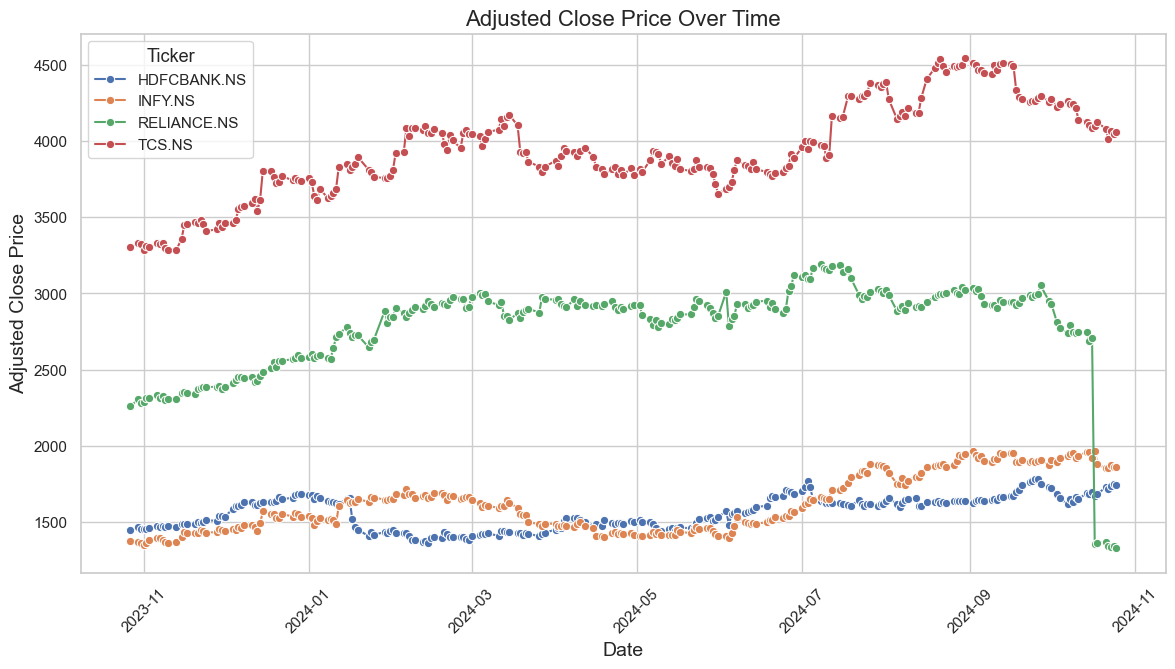

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

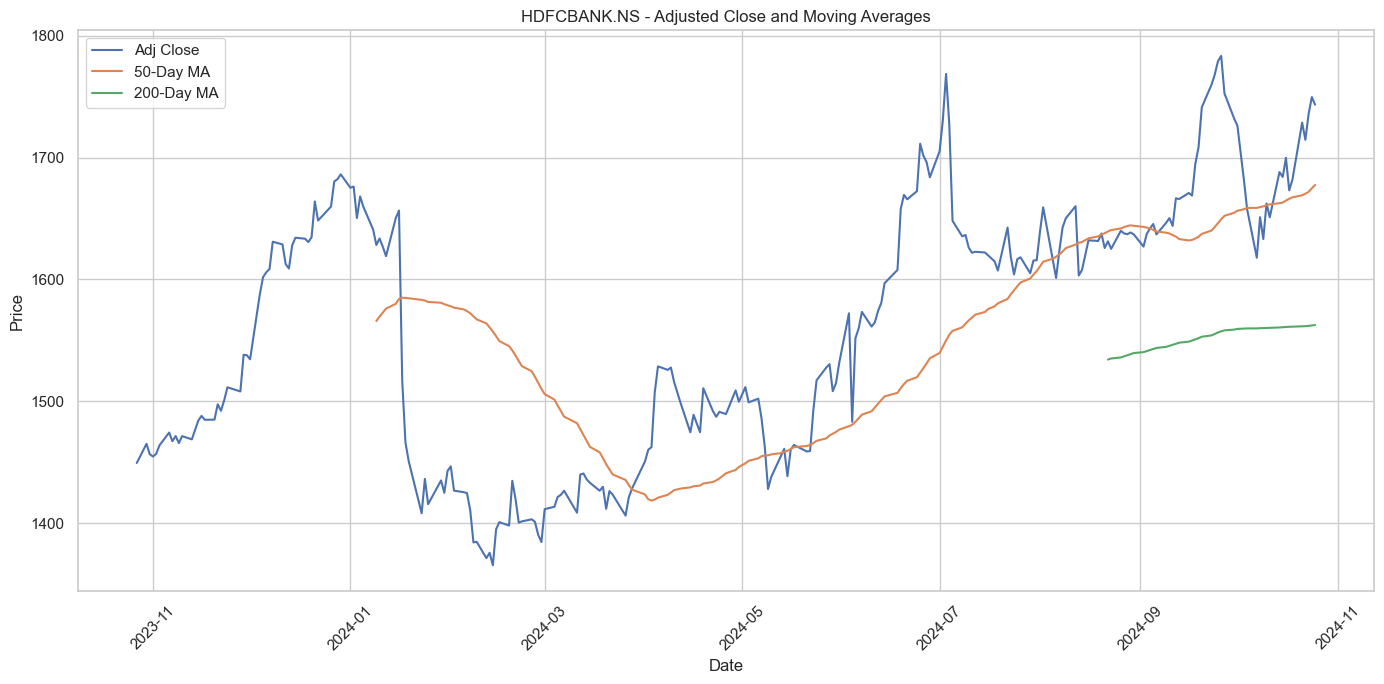

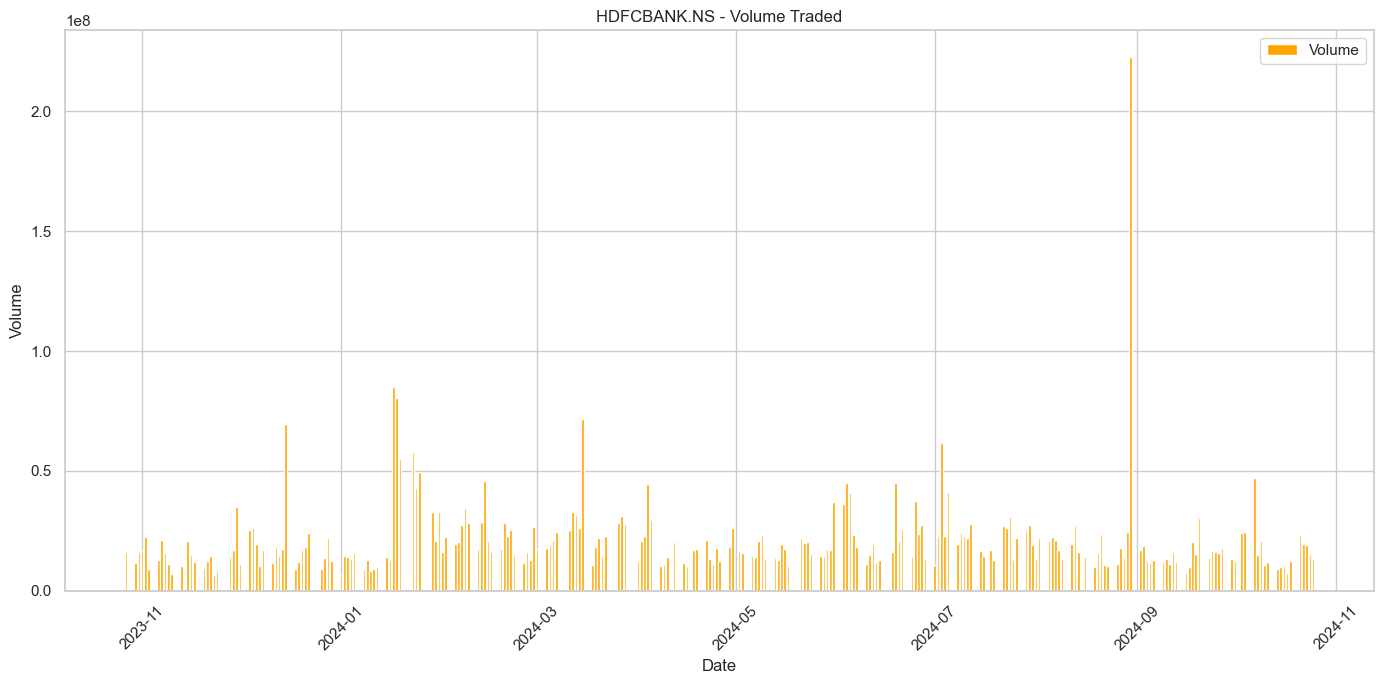

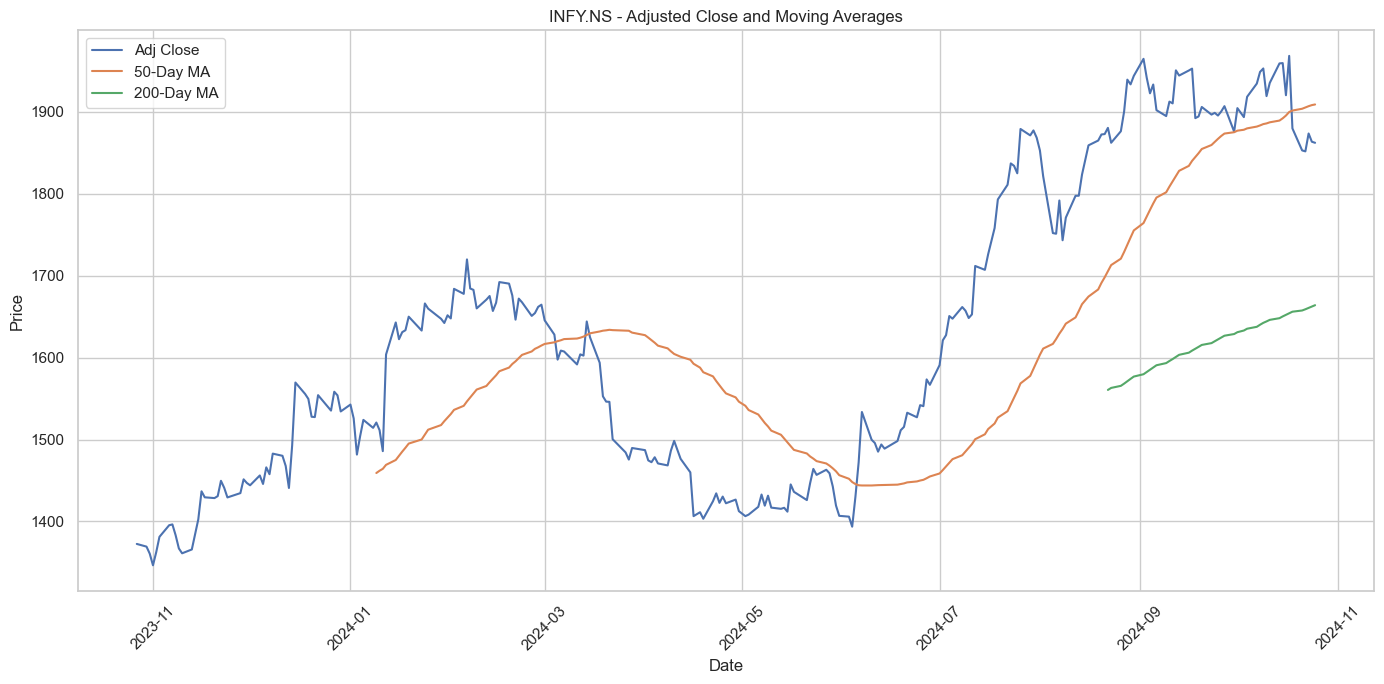

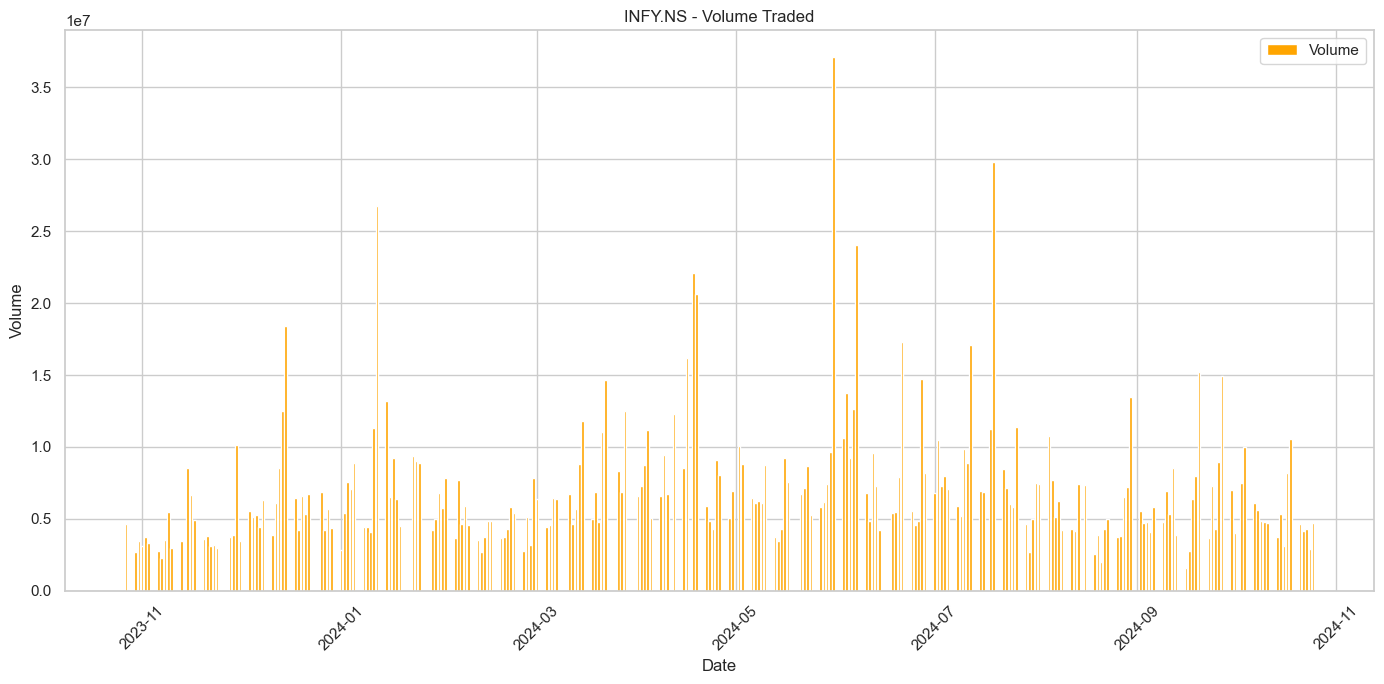

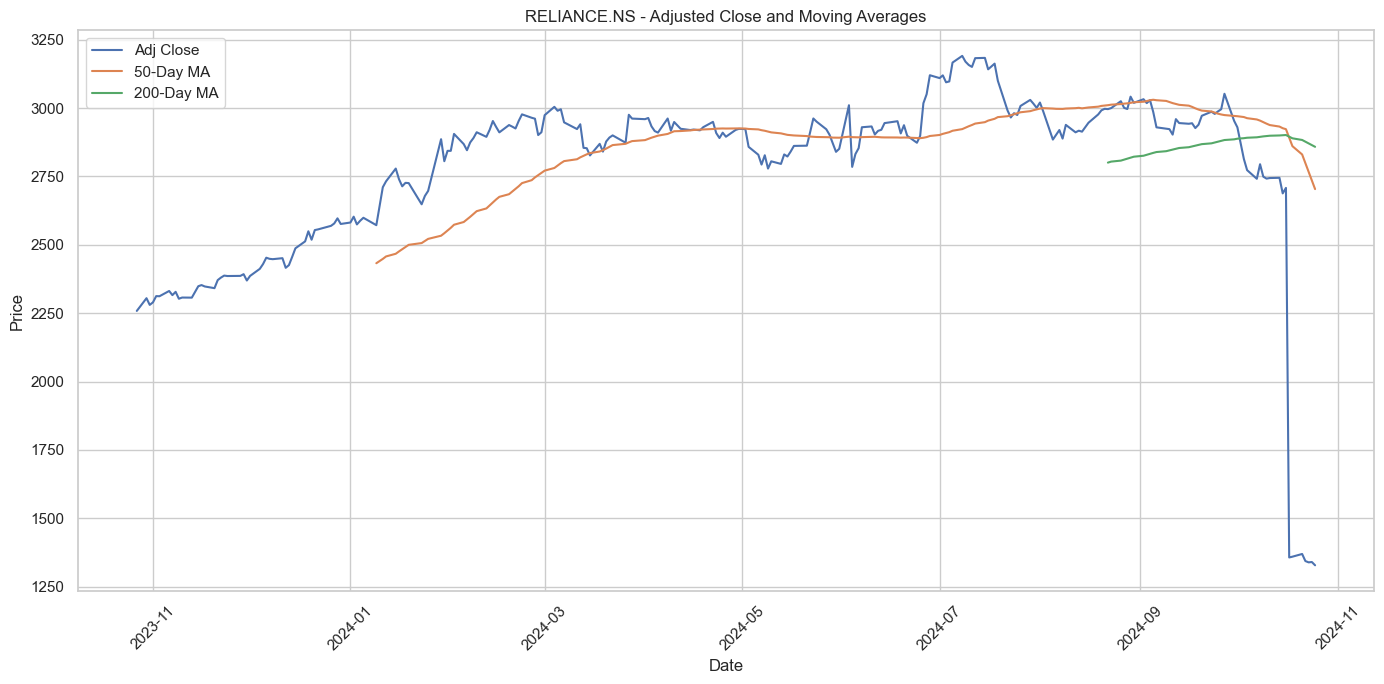

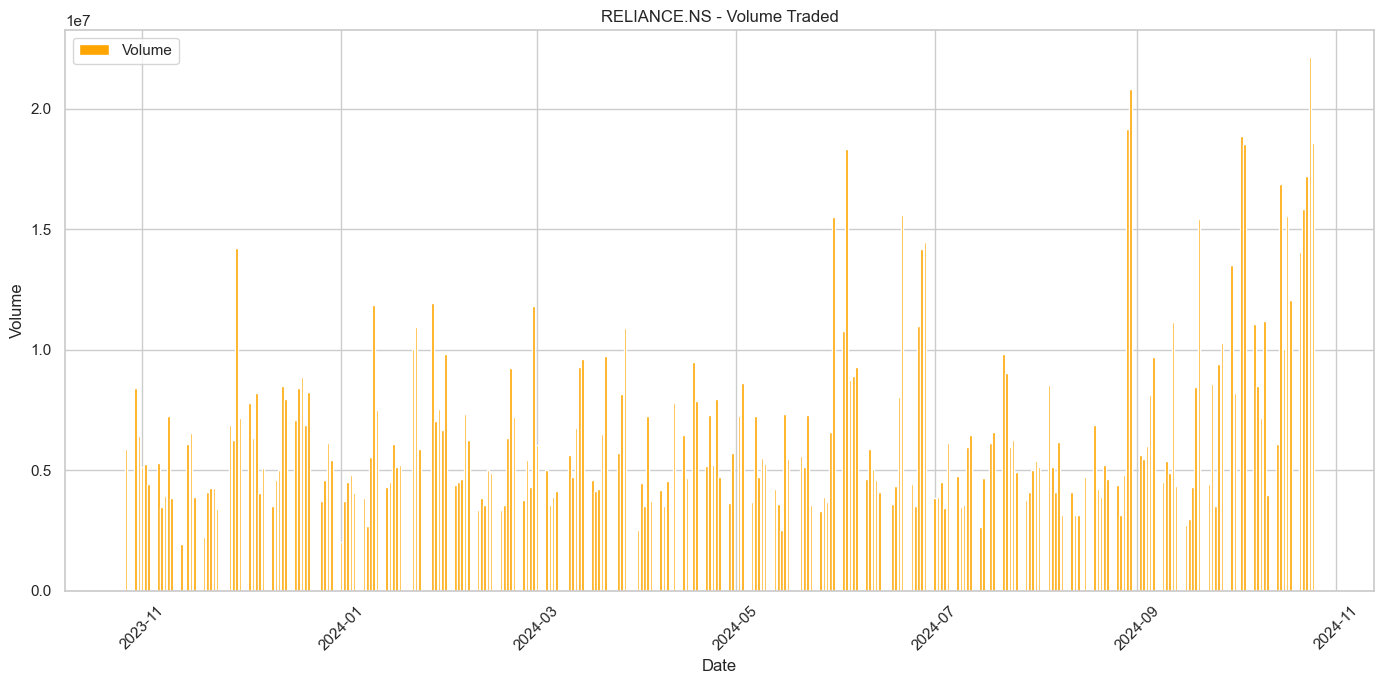

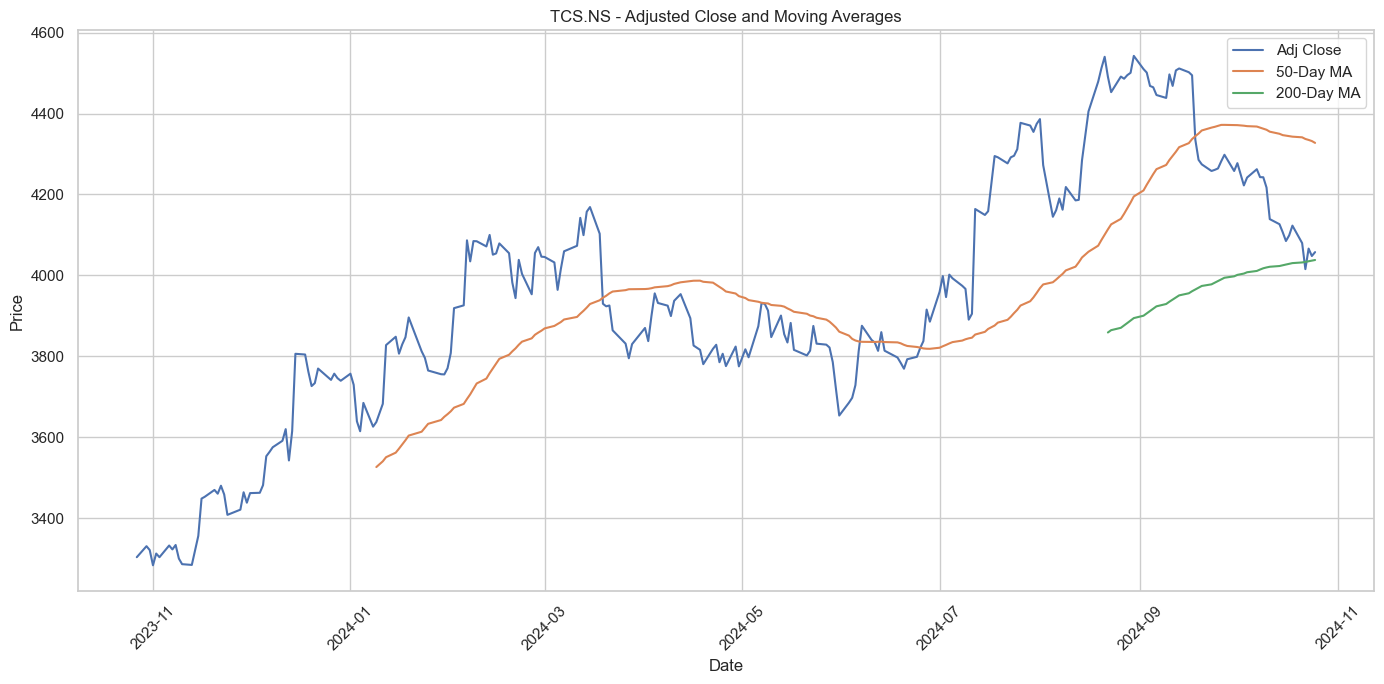

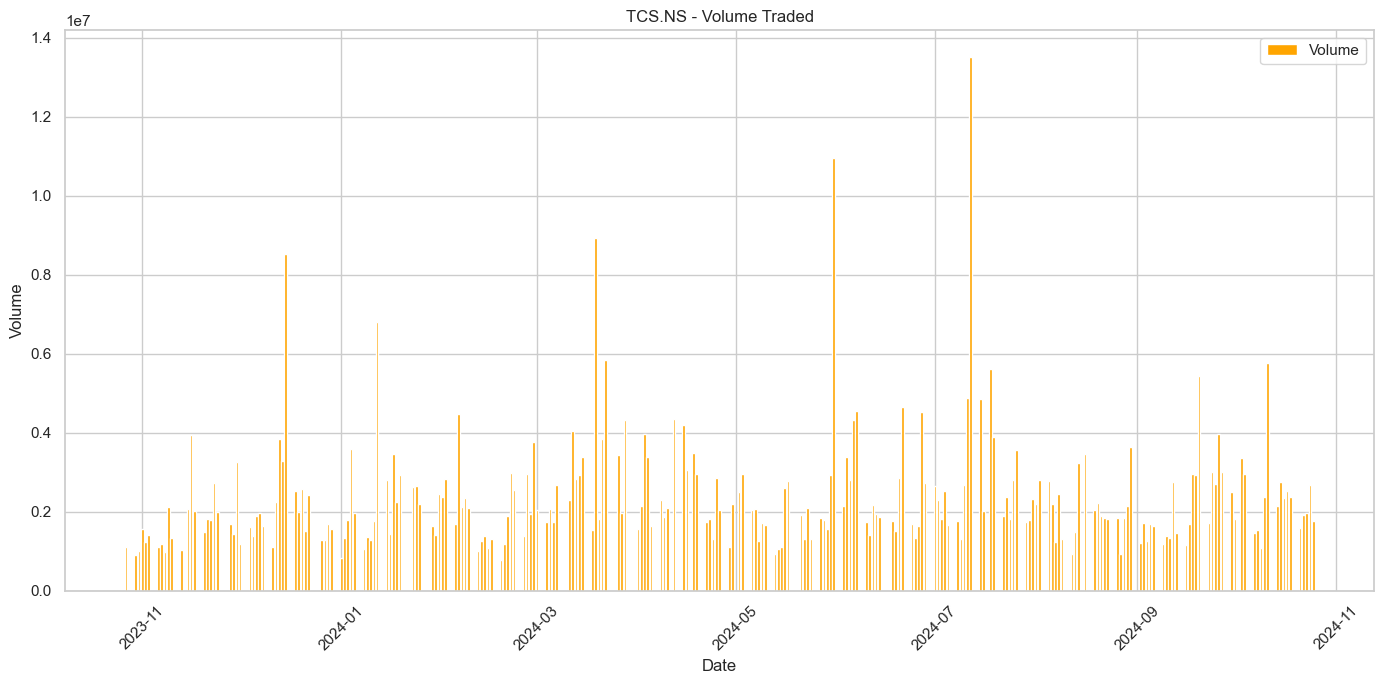

In [4]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

Now, let’s have a look at the distribution of daily returns of these stocks:

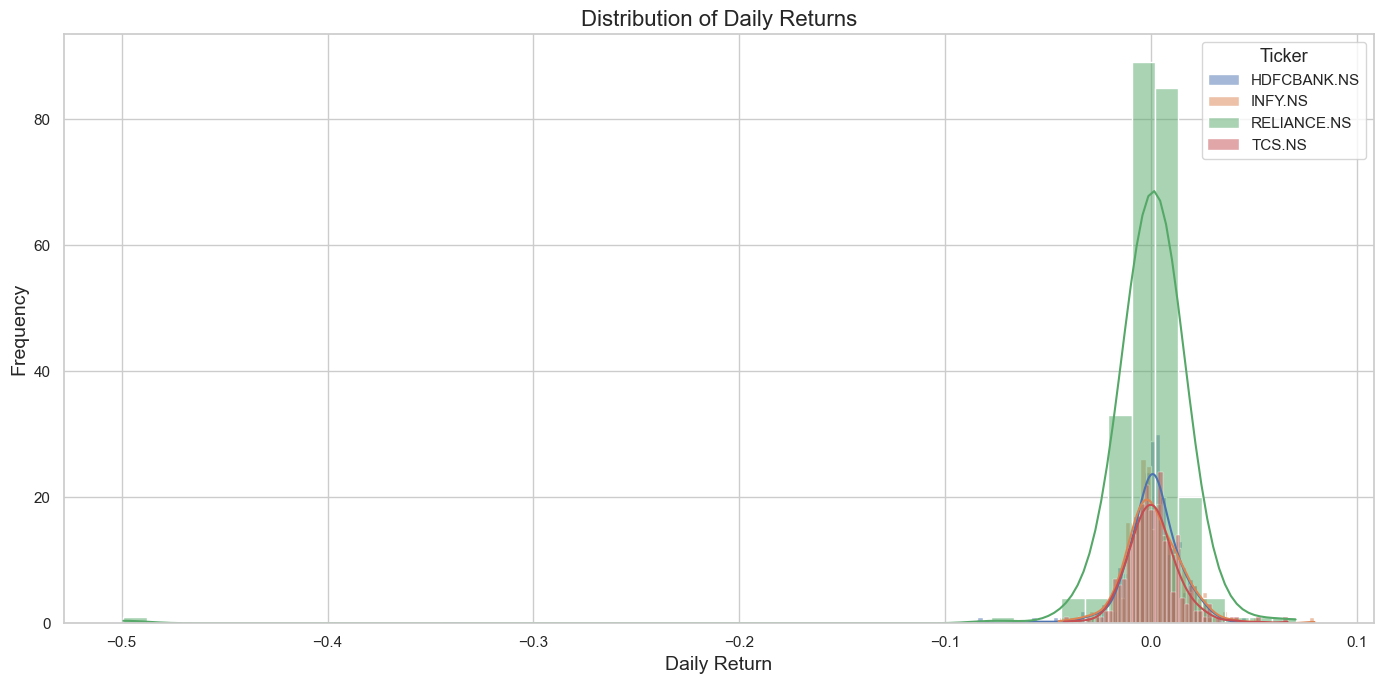

In [5]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

Now, let’s see if there’s any correlation between all these stocks:

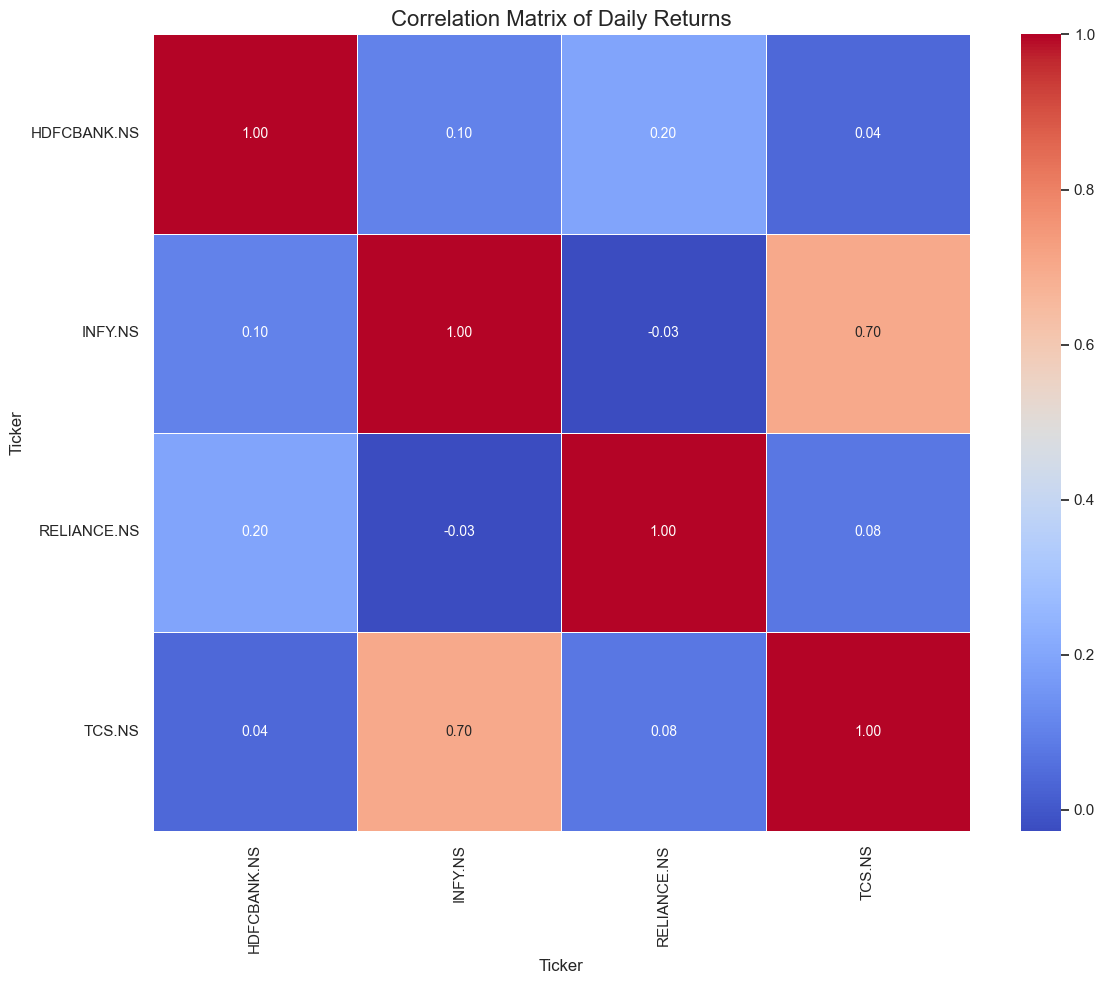

In [6]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.70), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.20) and a low correlation with INFY (0.10) and TCS (0.04). RELIANCE shows a low correlation with INFY (-0.03) and TCS (0.08). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

## Portfolio Optimization

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:
Calculate the expected returns and volatility for each stock.
Generate a series of random portfolios to identify the efficient frontier.
Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.
Let’s calculate the expected returns and volatility for each stock:

In [7]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.214999,0.219029
INFY.NS,0.340900,0.228238
RELIANCE.NS,-0.325566,0.553728
TCS.NS,0.233409,0.205823


RELIANCE has the lowest expected return (-32.56%) and the highest volatility (55.37%), indicating a potentially high-risk and low-reward investment. In contrast, INFY has the highest expected return (34.09%) with moderate volatility (22.82%), making it an attractive option for risk-adjusted returns. TCS and HDFCBANK also offer relatively high expected returns (23.34% and 21.50%, respectively) with moderate volatility (20.58% and 21.90%).

Next, we will:

Generate a large number of random portfolio weights.
Calculate the expected return and volatility for each portfolio.
Plot these portfolios to visualize the efficient frontier.
Let’s generate the random portfolios and plot the efficient frontier:

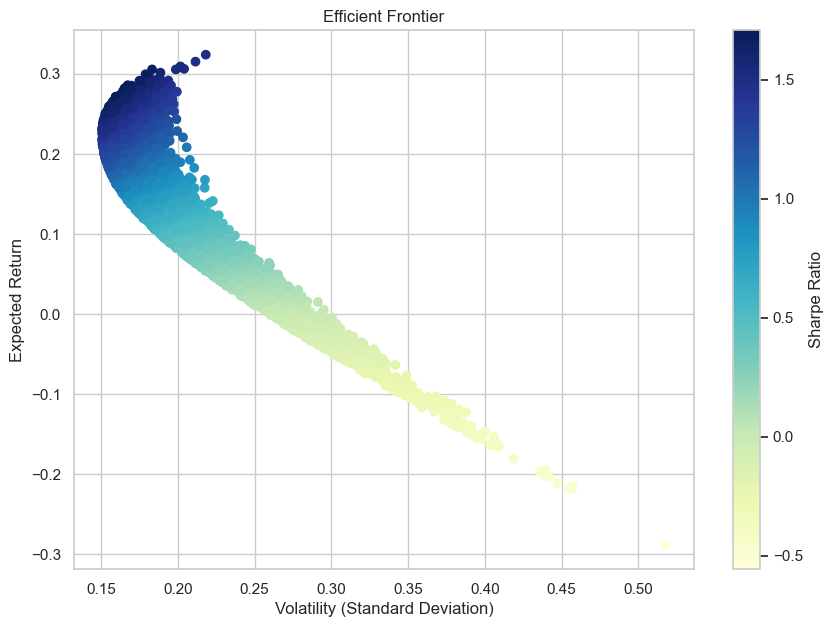

In [8]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

Here’s how to identify the portfolio with the maximum Sharpe ratio:

In [9]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.28573286137156356, 0.16737271168957846, 1.707165155461569)

The portfolio with the maximum Sharpe ratio has the following characteristics:

Expected Return: ~28.57%
Volatility: ~16.73%
Sharpe Ratio: ~1.70

Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [10]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.196821
1,INFY.NS,0.368287
2,RELIANCE.NS,0.296238
3,TCS.NS,0.138654


The output shows a diversified portfolio with the following allocations:

HDFCBANK (19.68%)
INFY (36.83%)
RELIANCE (29.62%)
TCS (13.87%)

INFY has the highest allocation, indicating its significant contribution to the portfolio’s performance, while TCS has the smallest allocation. This allocation aims to maximize returns while maintaining a moderate level of risk by distributing investments based on individual stock performances and their correlations.